In [3]:
import pandas as pd
df = pd.read_csv('emotion.csv')

In [4]:
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [5]:
df.shape

(16000, 2)

In [6]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [7]:
df.loc[5:10]

,text,label
5,ive been feeling a little burdened lately wasn...,0
6,ive been taking or milligrams or times recomme...,5
7,i feel as confused about life as a teenager or...,4
8,i have been with petronas for years i feel tha...,1
9,i feel romantic too,2
10,i feel like i have to make the suffering i m s...,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [9]:
df.label.value_counts()

label
1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

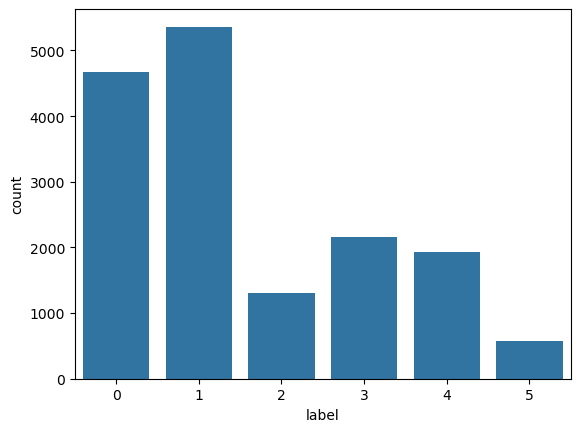

In [10]:
import seaborn as sns
sns.countplot(x=df.label)

In [11]:
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [12]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bhuvansai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Bhuvansai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Bhuvansai\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [13]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x : " ".join(x for x in x.split() if x not in stop))

In [14]:
df.text[1:5]

1    go feeling hopeless damned hopeful around some...
2            im grabbing minute post feel greedy wrong
3    ever feeling nostalgic fireplace know still pr...
4                                      feeling grouchy
Name: text, dtype: object

In [15]:
!pip install textblob

In [16]:
from nltk.stem import WordNetLemmatizer
from textblob import Word
df['text'] = df['text'].apply(lambda x:" ".join([Word(word).lemmatize() for word in x.split()]))


In [17]:
df.head()

,text,label
0,didnt feel humiliated,0
1,go feeling hopeless damned hopeful around some...,0
2,im grabbing minute post feel greedy wrong,3
3,ever feeling nostalgic fireplace know still pr...,2
4,feeling grouchy,3


In [18]:
X = df[['text']]
y = df['label']

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [29]:
X_test

,text
8756,ive made week feel beaten
4660,feel strategy worthwhile
6095,feel worthless weak say want find
304,feel clever nov
8241,im moved ive feeling kind gloomy
...,...
15578,feel useful pulpit find ironic often question ...
5746,dried bladder ready day im feeling brave
6395,feel thrilled matter day
7624,woke morning text mr c declaring walking work ...


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit(df['text'])
xtrain = tfidf.transform(X_train['text'])
xtest = tfidf.transform(X_test['text'])

In [36]:
xtrain

<12800x13464 sparse matrix of type '<class 'numpy.float64'>'
	with 115708 stored elements in Compressed Sparse Row format>

In [31]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
pclf = PassiveAggressiveClassifier()
pclf.fit(xtrain,y_train)
y_pred = pclf.predict(xtest)
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       936
           1       0.91      0.86      0.89      1079
           2       0.73      0.78      0.75       277
           3       0.86      0.84      0.85       438
           4       0.79      0.84      0.81       374
           5       0.69      0.81      0.75        96

    accuracy                           0.86      3200
   macro avg       0.81      0.84      0.83      3200
weighted avg       0.86      0.86      0.86      3200



In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
model = LogisticRegression()
model.fit(xtrain,y_train)
y_pred = model.predict(xtest)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       990
           1       0.96      0.79      0.87      1246
           2       0.56      0.90      0.69       185
           3       0.80      0.90      0.85       381
           4       0.74      0.86      0.79       341
           5       0.43      0.86      0.58        57

    accuracy                           0.85      3200
   macro avg       0.74      0.87      0.78      3200
weighted avg       0.88      0.85      0.86      3200



C:\Users\Bhuvansai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
from sklearn.linear_model import RidgeClassifier
model = RidgeClassifier()
model.fit(xtrain,y_train)
y_pred = model.predict(xtest)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       952
           1       0.95      0.86      0.90      1129
           2       0.71      0.86      0.78       245
           3       0.87      0.91      0.89       410
           4       0.83      0.88      0.86       374
           5       0.69      0.87      0.77        90

    accuracy                           0.89      3200
   macro avg       0.83      0.88      0.85      3200
weighted avg       0.90      0.89      0.89      3200



In [34]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(xtrain,y_train)
y_pred = model.predict(xtest)
print(classification_report(y_pred,y_test))

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.